In [1]:
from spaotsc import SpaOTsc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialization

In [2]:
# set up the data directory
datadir = "./data/zebrafish_embryo"
# read in the data files as pandas DataFrames with rows being cells and columns being genes
df_sc = pd.read_csv(datadir+"/zf_sc_normalized.txt",
    sep='\t', index_col=0)
df_sc_bin = pd.read_csv(datadir+"/zf_sc_isg_binarized.txt",
    sep='\t', index_col=0)
df_is_bin = pd.read_csv(datadir+"/zf_is_binarized.txt",
    sep='\t', index_col=0)
df_lasso = pd.read_csv(datadir+"/zf_seurat_preprocessed.txt",
    sep='\t', index_col=0)
genes = list(df_lasso.columns.values)
selected_genes = [g.lower() for g in genes]
is_dmat = np.load(datadir+"/zf_pos_pos_d_geodesic.npy")
sc_pcc = np.load(datadir+"/zf_seurat_lasso_pca40_pcc.npy")
mcc = np.load(datadir+'/zf_sc_is_mcc.npy')
issc = SpaOTsc.spatial_sc(sc_data=df_sc, sc_data_bin=df_sc_bin, is_data_bin=df_is_bin,
    sc_dmat = np.exp(1-sc_pcc), is_dmat=is_dmat)

# Mapping between datasets

In [3]:
# This generates the old distance
# issc.transport_plan(np.exp(1-mcc)**2, cor_matrix=mcc, alpha=0.1, rho=np.Inf, epsilon=1.0)
issc.transport_plan(np.exp(1-mcc)**2, cor_matrix=mcc, alpha=0.1, rho=100.0, epsilon=1.0)

array([[8.31986154e-10, 8.32790766e-10, 3.32973987e-09, ...,
        8.40222256e-06, 5.80924275e-05, 6.50632604e-05],
       [5.15031637e-05, 5.14876234e-05, 4.58005006e-05, ...,
        1.70387842e-09, 6.38183986e-09, 2.88437348e-09],
       [2.69180135e-08, 2.69090696e-08, 1.23107056e-07, ...,
        4.76360835e-05, 4.04055782e-06, 2.85262668e-06],
       ...,
       [1.38588616e-06, 1.38489916e-06, 1.16503670e-06, ...,
        9.34863981e-06, 4.68947099e-07, 3.33686640e-07],
       [1.28689448e-05, 1.28630259e-05, 1.10372310e-05, ...,
        9.84255785e-08, 1.10936060e-06, 8.12532812e-07],
       [7.66561120e-06, 7.66150364e-06, 6.62925321e-06, ...,
        5.09446295e-07, 6.60574734e-06, 5.35139611e-06]])

# Cell-cell distance

In [63]:
# Compute cell-cell distance
# issc.cell_cell_distance(use_landmark=False, epsilon=0.01)
# np.save(datadir+"/zf_sc_dmat_spatial_epsilon0.1.npy", issc.sc_dmat_spatial)
# Load precomputed distance
sc_dmat_spatial = np.load(datadir+"/zf_sc_dmat_spatial.npy")
# sc_dmat_spatial = np.load("./test_data/zf/zf_sc_dmat_spatial.npy")
issc.cell_cell_distance(sc_dmat_spatial=sc_dmat_spatial)

array([[0.        , 0.83032982, 0.97520774, ..., 0.97336038, 0.80413146,
        0.88637041],
       [0.83032982, 0.        , 0.94739858, ..., 0.66263547, 0.35184562,
        0.42837741],
       [0.97520774, 0.94739858, 0.        , ..., 0.33943298, 0.61977   ,
        0.54082208],
       ...,
       [0.97336038, 0.66263547, 0.33943298, ..., 0.        , 0.35923655,
        0.25320112],
       [0.80413146, 0.35184562, 0.61977   , ..., 0.35923655, 0.        ,
        0.1270374 ],
       [0.88637041, 0.42837741, 0.54082208, ..., 0.25320112, 0.1270374 ,
        0.        ]])

# Cell spatial subclustering

In [5]:
issc.clustering(genes=selected_genes, pca_n_components=20)

0 3 [139, 112, 88]
1 3 [84, 75, 26]
2 2 [84, 74]
3 4 [55, 34, 31, 1]
4 4 [16, 15, 14, 3]
0 339 sox3
sox3
shisa2
aldob
cited4b
snai2
0 0 139 bambia
bambia
tfap2c
sox3
klf2b
ved
0 1 112 fam212aa
fam212aa
shisa2
sox3
hmgb2a
cxcr4a
0 2 88 shisa2
shisa2
sox3
aldob
snai2
glulb
1 185 eve1
eve1
her7
vox
ved
bambia
1 0 84 bambia
bambia
her7
ved
blf
eve1
1 1 75 eve1
eve1
ved
vox
hes6
ta
1 2 26 parp6a
parp6a
iah1
eya3
ythdf3
cdk11b
2 158 mixl1
mixl1
wnt11
ta
fscn1a
osr1
2 0 84 eve1
eve1
ta
mixl1
wnt11
sebox
2 1 74 osr1
osr1
mixl1
fscn1a
aplnrb
wnt11
3 121 admp
admp
noto
chd
foxd5
zic3
3 0 55 admp
admp
noto
chd
foxd5
id1
3 1 34 cxcr4a
cxcr4a
zic2b
alcamb
admp
aldob
3 2 31 gadd45ba
gadd45ba
foxa3
chd
xbp1
fscn1a
4 48 irx7
irx7
gadd45ba
hsd17b14
igf2a
pak1ip1
4 0 16 chd
chd
gadd45ba
hif1al
igf2a
csnk2a2a
4 1 15 tmem263
tmem263
nudt15
aga
klf2b
aaas
4 2 14 fmo5
fmo5
svopl
znf277
slc38a7
gnmt


# Leave-one-out cross-validation

In [90]:
# Load the precomputed matthew's correlation coefficients for LOO CV.
# mcc_loo[i,:,:] is the correlation matrix between single cells and spatial locations using landmark genes except the ith one.
mcc_loo = np.load(datadir+"/zf_sc_is_mcc_loo.npy")
# For example, run the following to get the loo prediction results for the landmark genes
X_pred = issc.mapping_loo_validation(cor_matrices=mcc_loo, alpha=0.5, epsilon=0.1, rho=1.0, output_prediction=True)
np.save(datadir+"/X_is_pred.npy", X_is)

0
0 0.903030303030303
1
1 0.9866666666666666
2
2 0.9833333333333334
3
3 0.9777306468716861
4
4 0.9500000000000001
5
5 0.873015873015873
6
6 0.9712070874861571
7
7 0.9242857142857143
8
8 0.8625
9
9 0.9555555555555555
10
10 0.9169435215946844
11
11 0.9859859859859859
12
12 0.84765625
13
13 0.8958333333333333
14
14 0.9696969696969696
15
15 0.9322916666666667
16
16 0.967251461988304
17
17 0.9876923076923076
18
18 0.9281609195402298
19
19 0.9556277056277056
20
20 0.9476923076923077
21
21 0.9918367346938776
22
22 1.0
23
23 0.9723145071982281
24
24 0.9927083333333333
25
25 0.9419642857142857
26
26 1.0
27
27 0.99609375
28
28 0.9934895833333333
29
29 1.0
30
30 0.9399656946826759
31
31 1.0
32
32 0.8462354188759279
33
33 0.9665178571428571
34
34 1.0
35
35 0.9815384615384615
36
36 1.0
37
37 0.8528645833333333
38
38 0.9615384615384616
39
39 1.0
40
40 1.0
41
41 1.0
42
42 0.9595959595959596
43
43 0.8059895833333333
44
44 0.9439102564102564
45
45 0.9839743589743589
46
46 0.9979166666666667
0.954268342

# Plotting results

## Plot clustering and subclusering results with UMAP
[Supplementary Fig. 8]

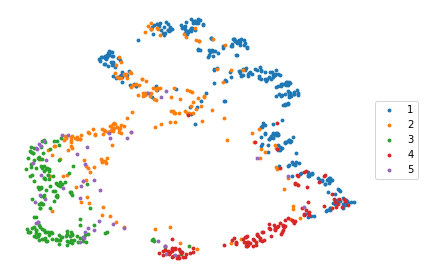

[3 3 2 3 3]


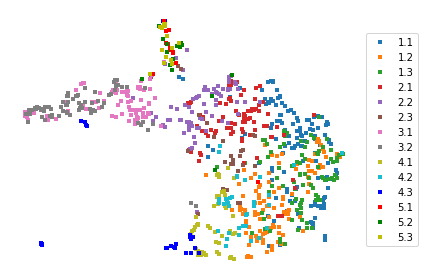

[3 3 2 3 3]


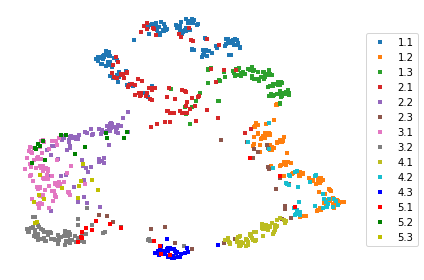

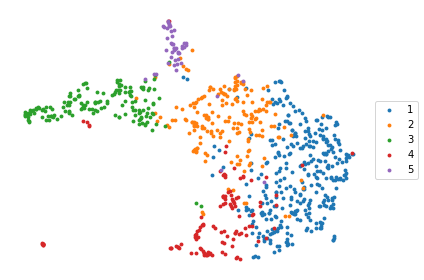

<Figure size 432x288 with 0 Axes>

In [83]:
issc.sc_dmat_spatial += 1000.0
for i in range(issc.sc_dmat_spatial.shape[0]):
    issc.sc_dmat_spatial[i,i] = 0
issc.visualize_cells(type=1, method='umap', umap_n_neighbors=30, umap_min_dist=0.5)
plt.savefig(datadir+"/Figs/clustering_seq_spatialUMAP.png", dpi=300)
plt.show()
plt.clf()
issc.visualize_cells(type=2, method='umap')
plt.savefig(datadir+"/Figs/clustering_spatial_seqUMAP.png", dpi=300)
plt.show()
plt.clf()
issc.visualize_cells(type=3, method='umap', umap_n_neighbors=30, umap_min_dist=0.5)
plt.savefig(datadir+"/Figs/clustering_spatial_spatialUMAP.png", dpi=300)
plt.show()
plt.clf()
issc.visualize_cells(type=4, method='umap')
plt.savefig(datadir+"/Figs/clustering_seq_seqUMAP.png", dpi=300)
plt.show()
plt.clf()
issc.sc_dmat_spatial -= 1000.0
for i in range(issc.sc_dmat_spatial.shape[0]):
    issc.sc_dmat_spatial[i,i] = 0

## Plot spatial origins of the subclusters
### [Supplementary Fig. 9]

In [58]:
from scipy import interpolate
from scipy.interpolate import griddata
from matplotlib import cm
def plot_zf(pts, f, title_text):
    n_theta = 500
    n_phi = 250
    r = 1
    theta, phi = np.mgrid[-0.5*np.pi:0.5*np.pi:n_theta*1j, 0.0:0.5*np.pi:n_phi*1j]
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)

    phi_data = np.arccos(pts[:,2])
    theta_data = np.arcsin(pts[:,0]/np.sin(phi_data))
    pts_angle = np.concatenate((theta_data.reshape(-1,1), phi_data.reshape(-1,1)), axis=1)
    phi_grid = phi_data.reshape(8,8)
    theta_grid = theta_data.reshape(8,8)
    f_grid = f.reshape(8,8)
    tck = interpolate.bisplrep(theta_grid, phi_grid, f_grid, s=0)
    fnew = interpolate.bisplev(theta[:,0], phi[0,:], tck)


    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z,facecolors=cm.winter(fnew/fnew.max()))
    ax.set_title(title_text, fontsize=36, y=0.9, x=0.5, fontname='arial')
    ax.view_init(elev=10., azim=0)
    plt.axis('off')
    # plt.show()
def plot_zf_plain(pts, f, title_text):
    n_theta = 100
    n_phi = 50
    r = 1
    theta, phi = np.mgrid[-0.5*np.pi:0.5*np.pi:n_theta*1j, 0.0:0.5*np.pi:n_phi*1j]
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)

    phi_data = np.arccos(pts[:,2])
    theta_data = np.arcsin(pts[:,0]/np.sin(phi_data))
    pts_angle = np.concatenate((theta_data.reshape(-1,1), phi_data.reshape(-1,1)), axis=1)

    grid_c_nearest = griddata(pts_angle, f, (theta, phi), method='nearest')
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z,facecolors=cm.winter(grid_c_nearest/grid_c_nearest.max()))
    ax.set_title(title_text, fontsize=36, y=0.9, x=0.5, fontname='arial')
    ax.view_init(elev=10., azim=0)
    plt.axis('off')

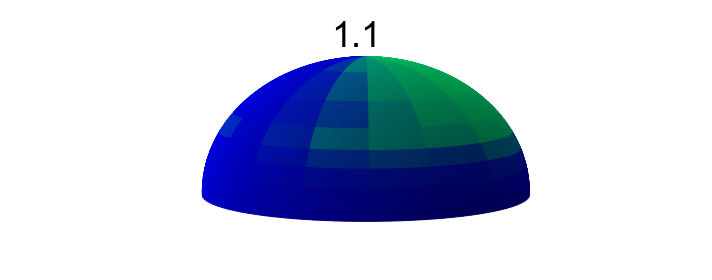

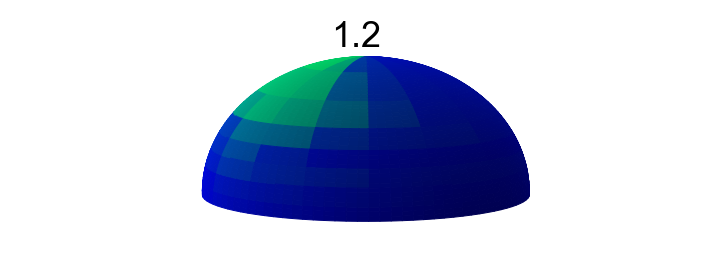

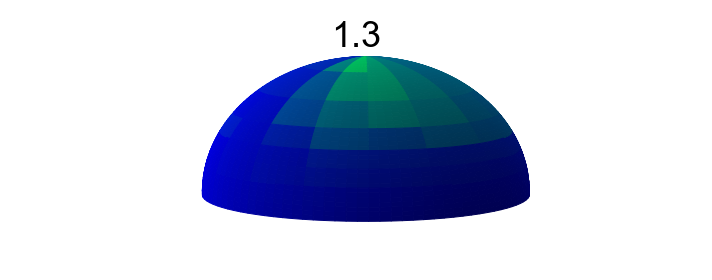

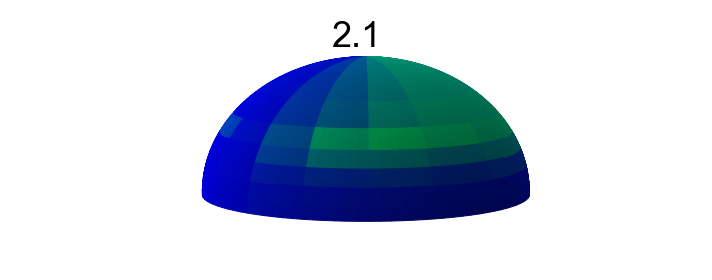

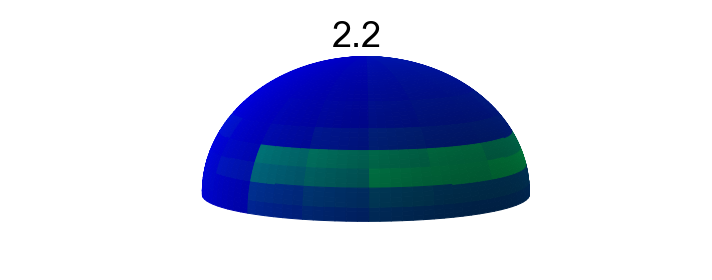

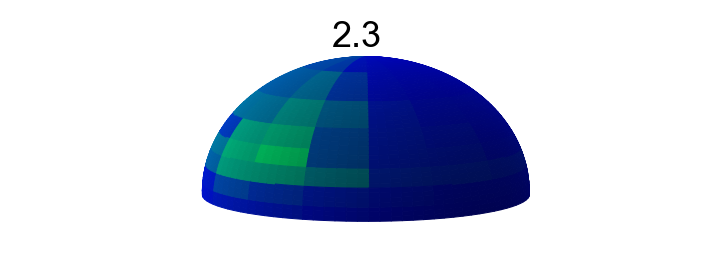

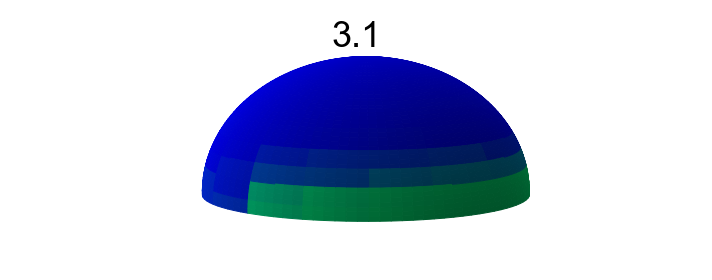

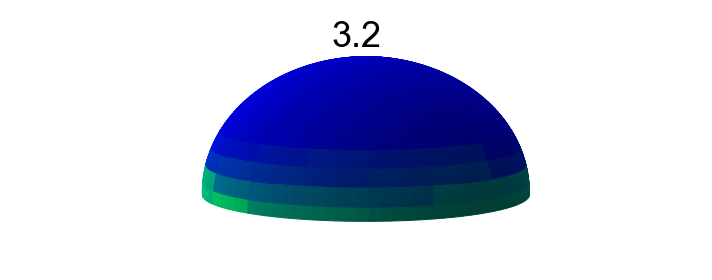

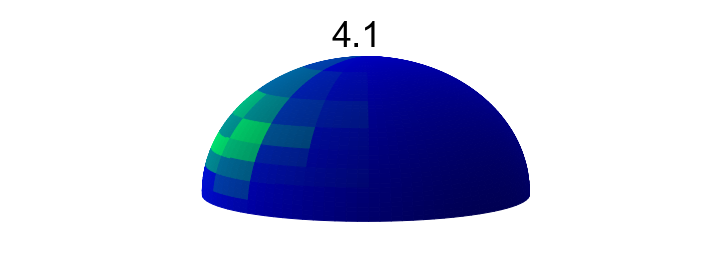

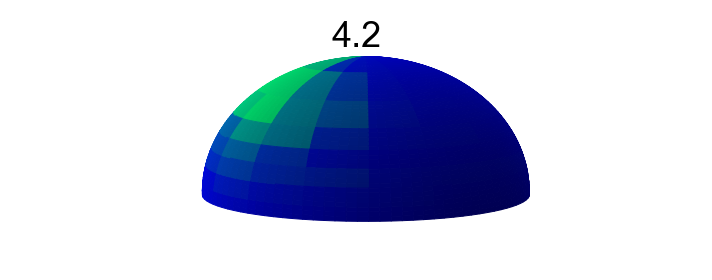

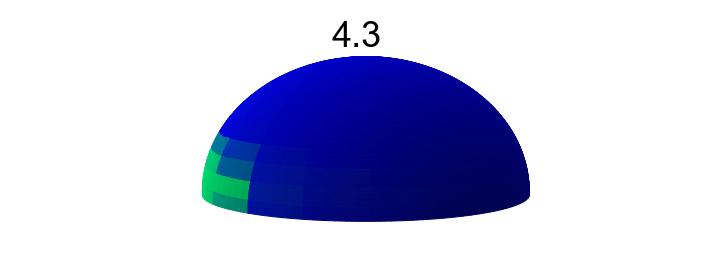

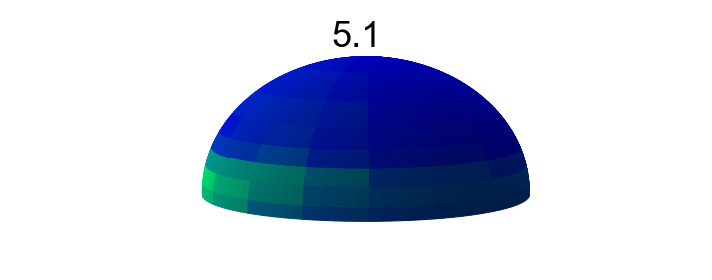

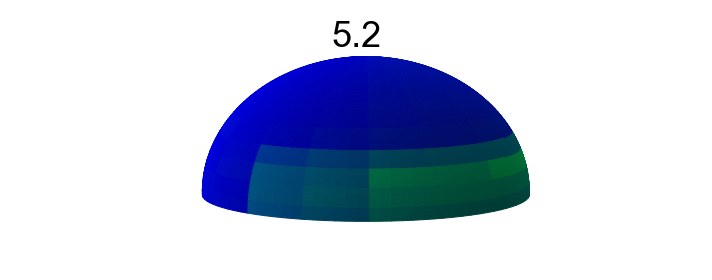

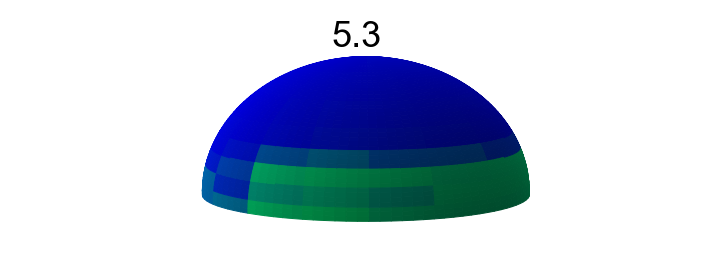

In [59]:
partition_inds_subcluster = issc.clustering_partition_inds
df_pts = pd.read_csv(datadir+"/zf_geometry.txt", sep=' ')
pts = np.array( df_pts.values, float )
gamma = issc.gamma_mapping
for i in range(gamma.shape[0]):
    gamma[i,:] = gamma[i,:]/np.sum(gamma[i,:])
nscl = [3,3,2,3,3]

cnt = 0
for i in range(len(nscl)):
    for j in range(nscl[i]):
        tmp_ids = partition_inds_subcluster[(i,j)]
        name = datadir+"/Figs/subcluster_spatial_origins/%02d.png" % (cnt+1)
        plot_zf_plain(pts, np.mean(gamma[tmp_ids,:], axis=0), str(i+1)+'.'+str(j+1))
        plt.tight_layout()
#         plt.title(str(i+1)+'.'+str(j+1), fontsize=20, z=0.5)
        plt.savefig(name, dpi=300, bbox_inches="tight", pad_inches=0)
        cnt += 1

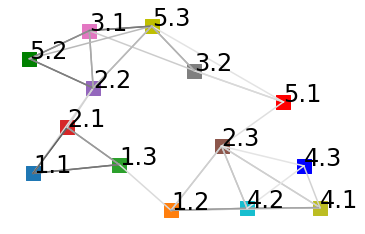

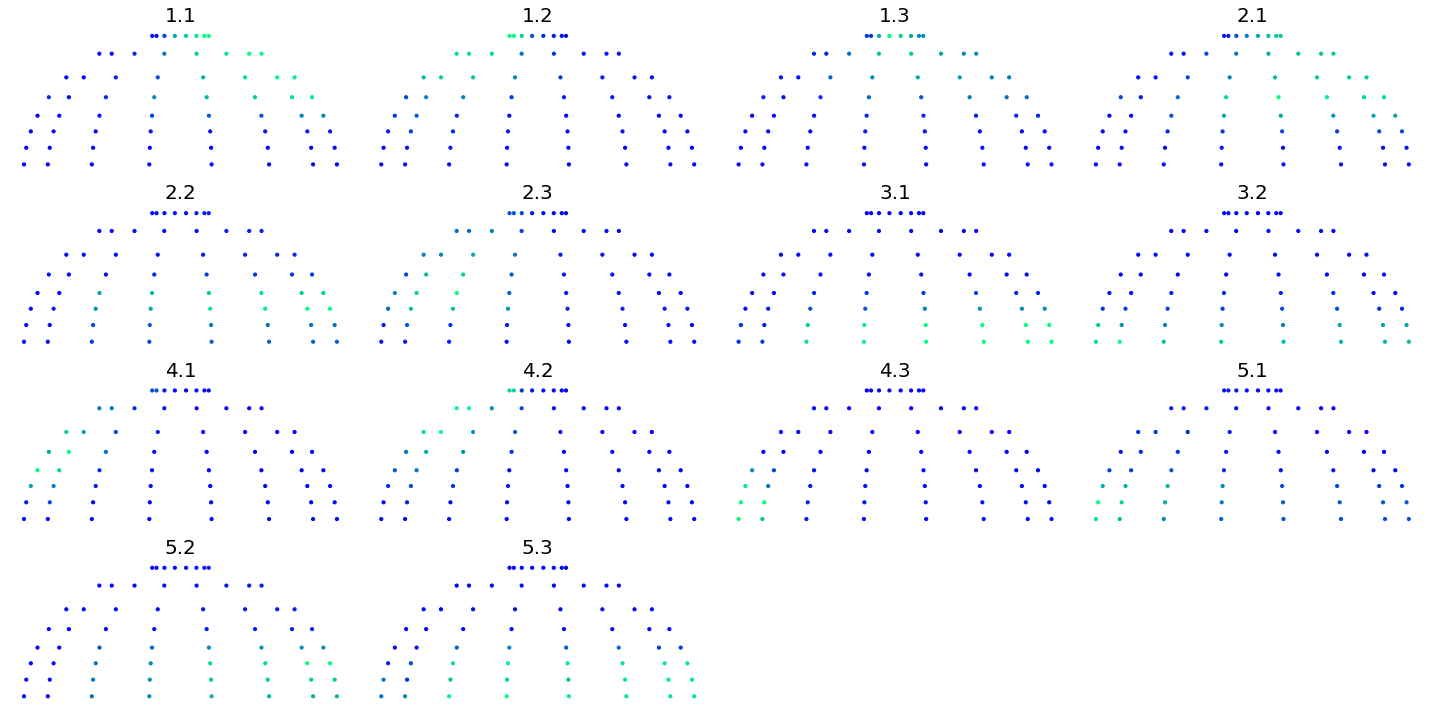

In [72]:
issc.visualize_subclusters(pts=pts[:,np.array([0,2])], umap_k=10, figsize=(20,10), vmax=8.0)

## Plot the leave-one-out cross-validation results
### [Fig. 2a2, Supplementary Fig. 4]

0.9518724793646735


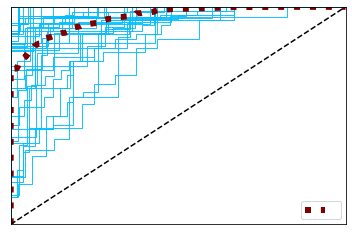

In [17]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Load the predictions made by the LOO CV
X_is_pred = np.load(datadir+"/X_is_pred.npy")
X_is_bin = np.array( issc.is_data_bin.values, int )
fpr = {}
tpr = {}
for i in range(47):
    pred = X_is_pred[:,i]
    true = X_is_bin[:,i]
    fpr[i], tpr[i], _ = roc_curve(true, pred)
    plt.plot(fpr[i], tpr[i], "deepskyblue", linewidth=1, alpha=0.9)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(47)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(47):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= 47
fpr["macro"] = [0]+list(all_fpr)
tpr["macro"] = [0]+list(mean_tpr)
plt.plot(fpr["macro"], tpr["macro"], "maroon", linestyle=':', linewidth=6, label=" ")
plt.plot([0.0,1.0],[0.0,1.0], 'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc="lower right")

plt.xticks([])
plt.yticks([])
print(auc(fpr["macro"], tpr["macro"]))
plt.savefig(datadir+"/Figs/aucs.png", dpi=300)

/Users/cang/anaconda3/envs/spaotsc_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


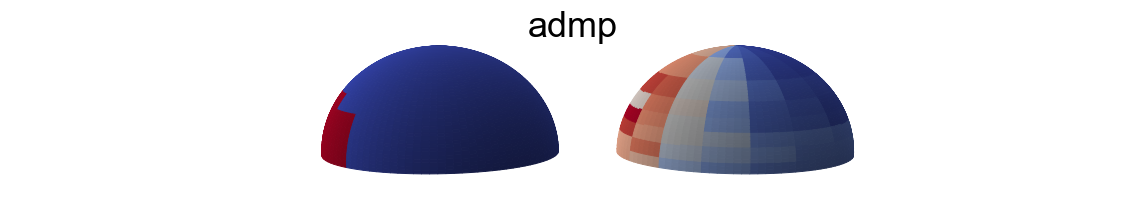

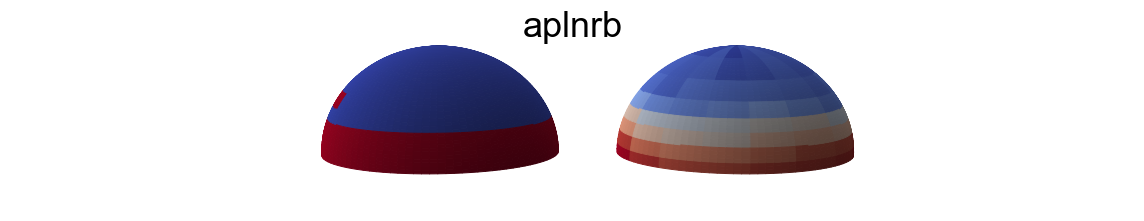

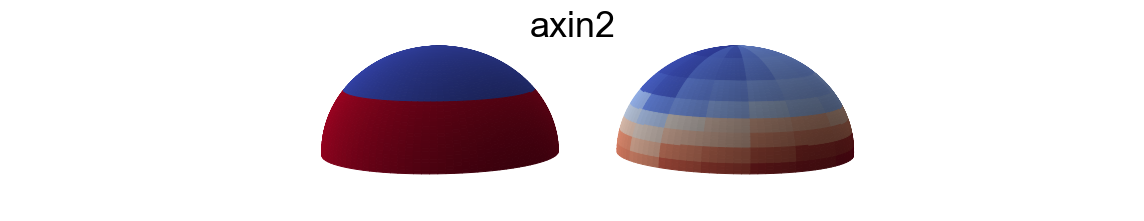

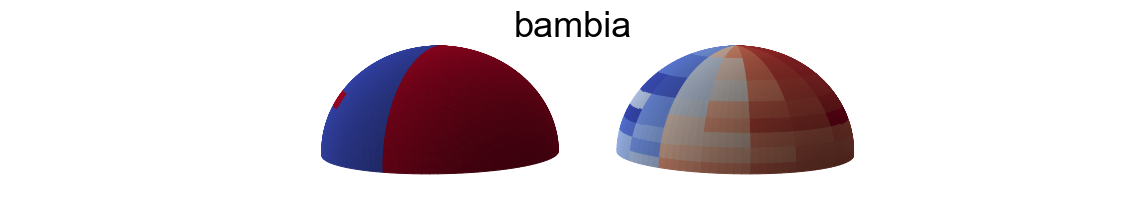

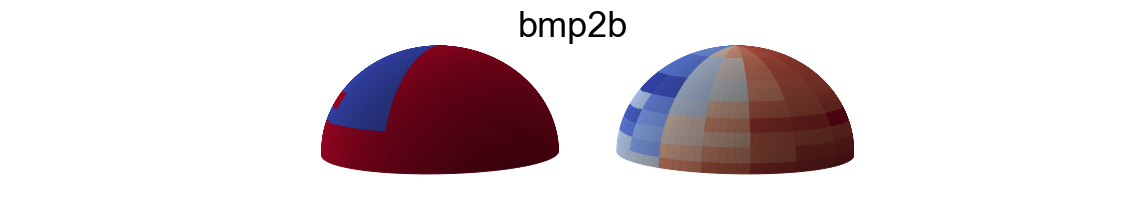

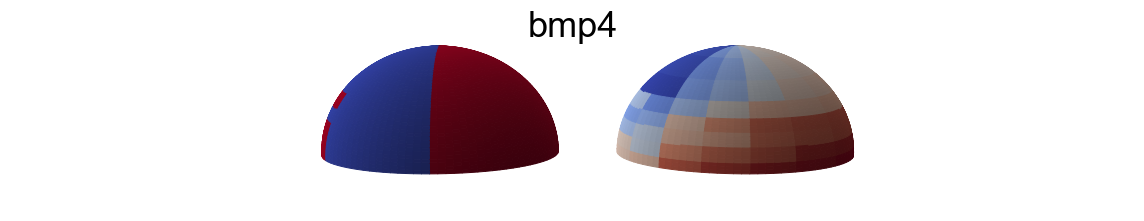

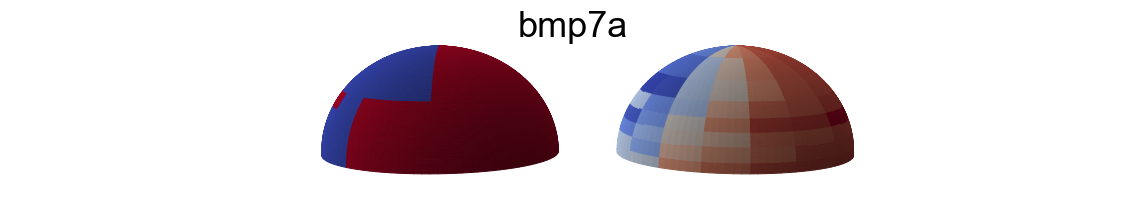

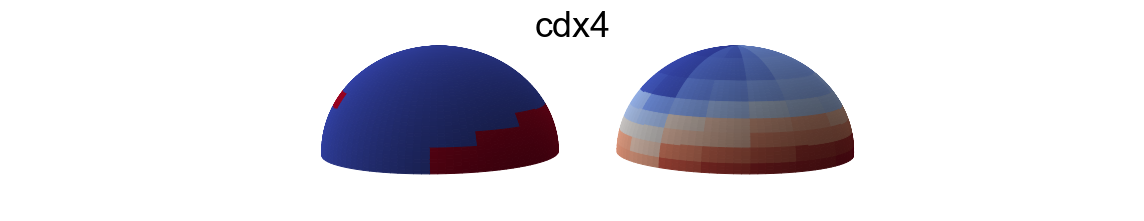

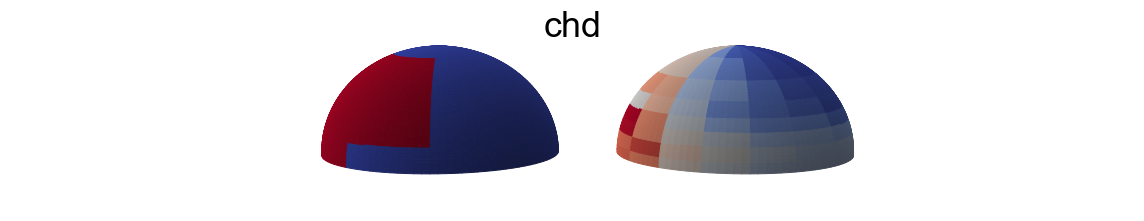

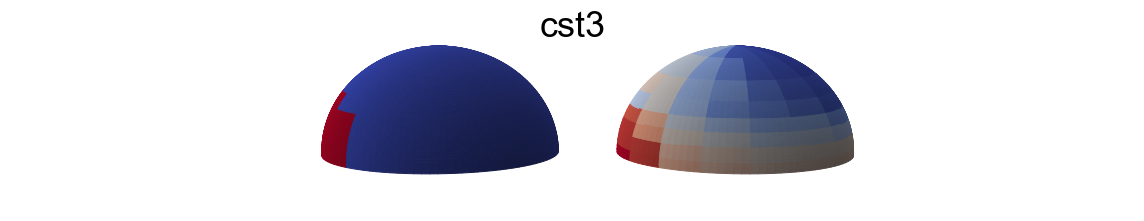

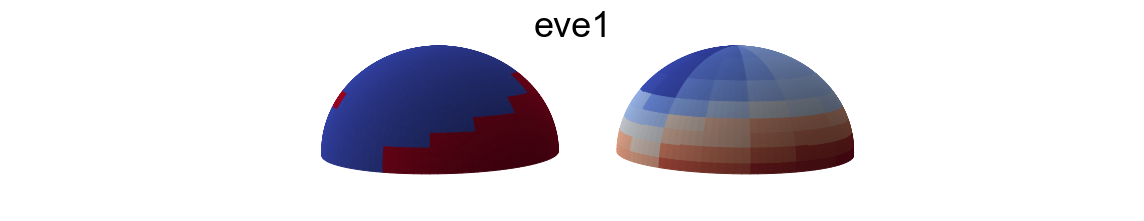

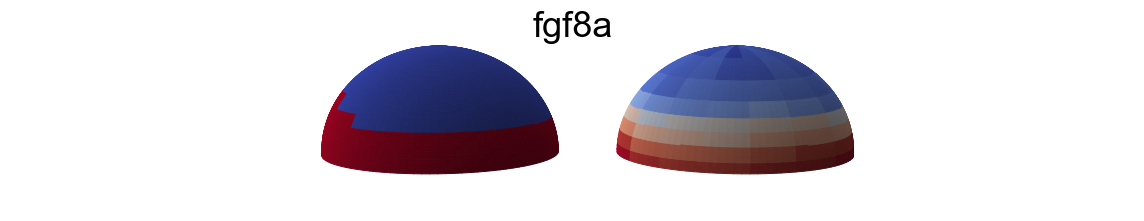

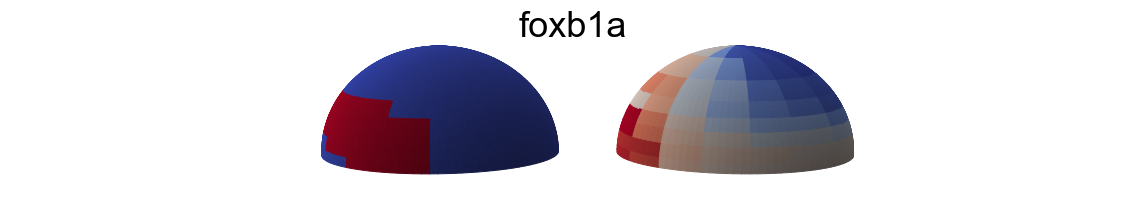

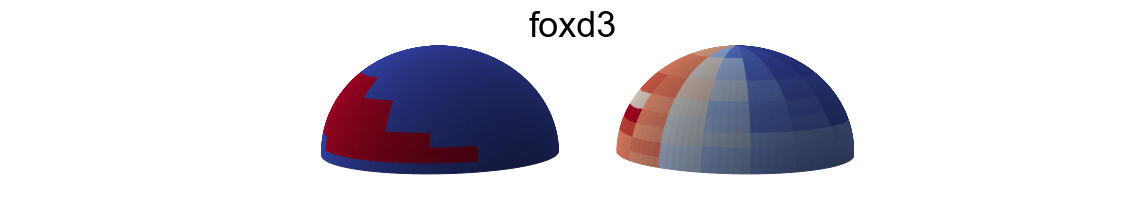

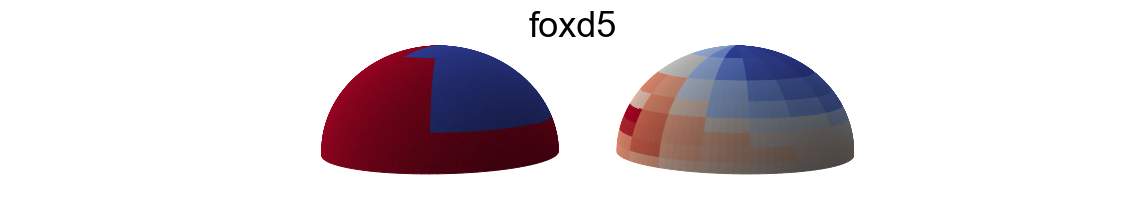

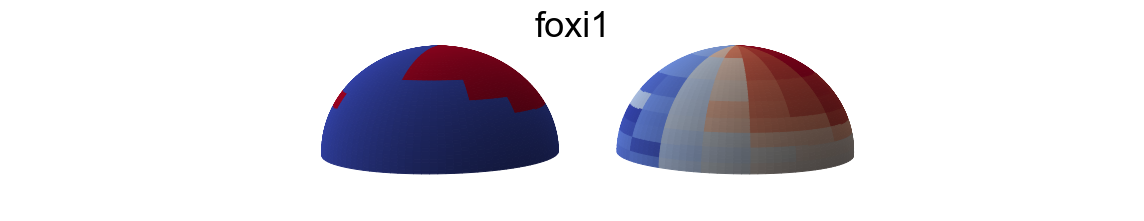

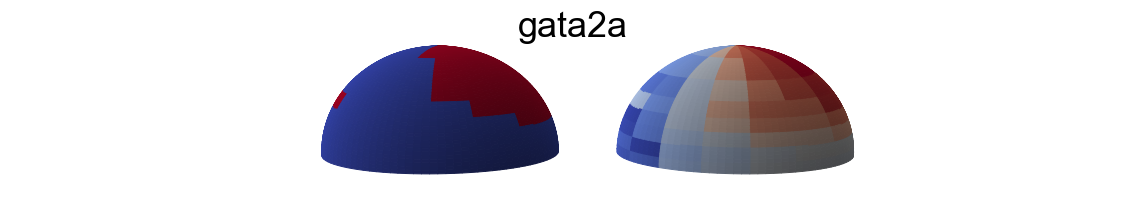

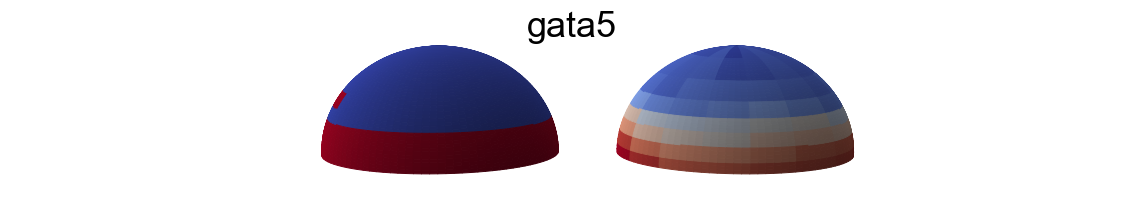

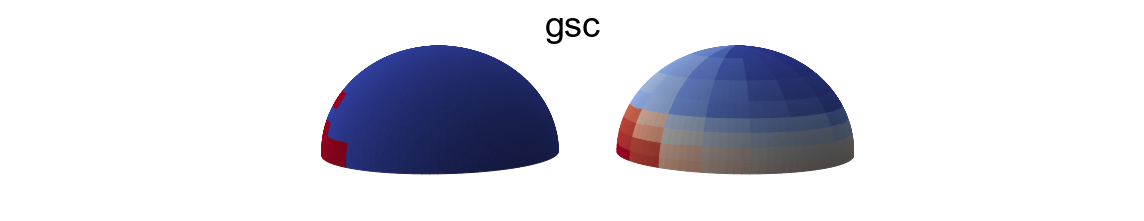

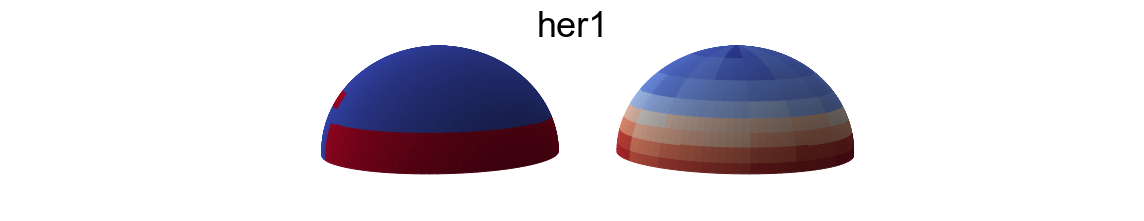

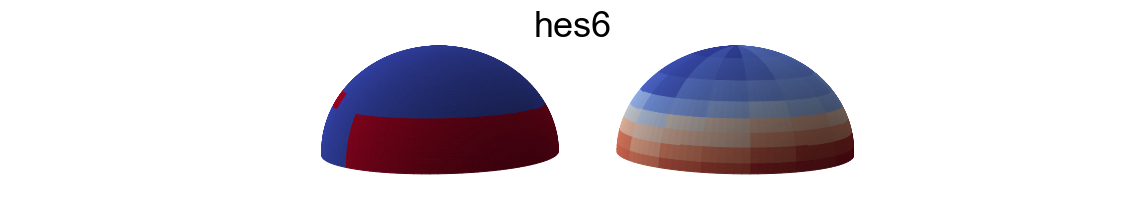

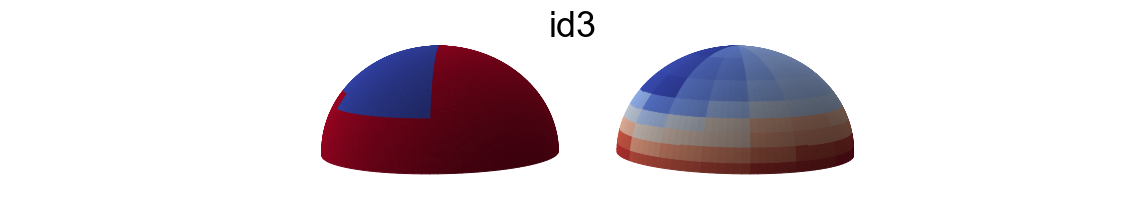

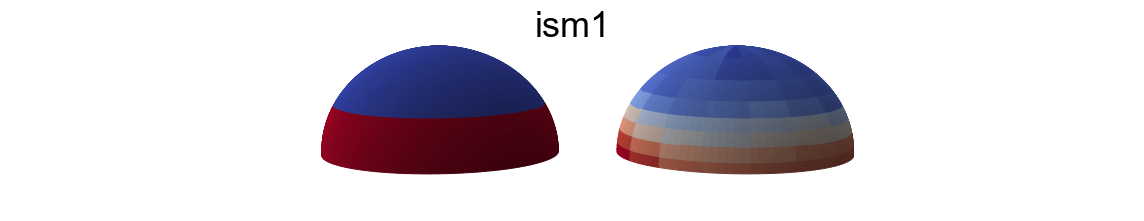

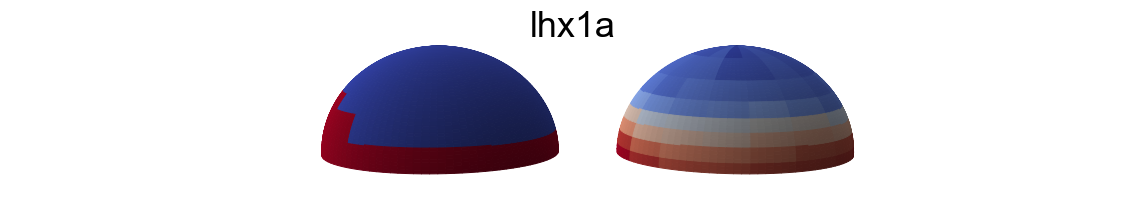

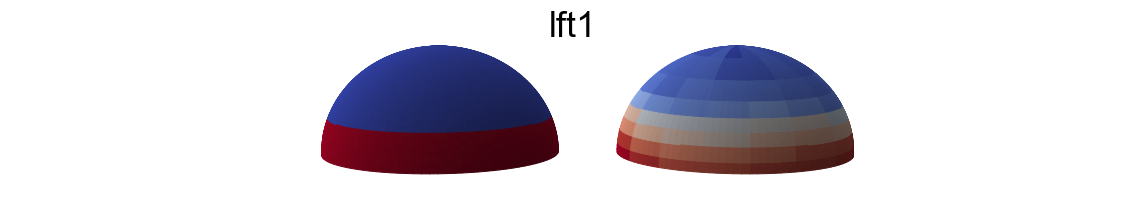

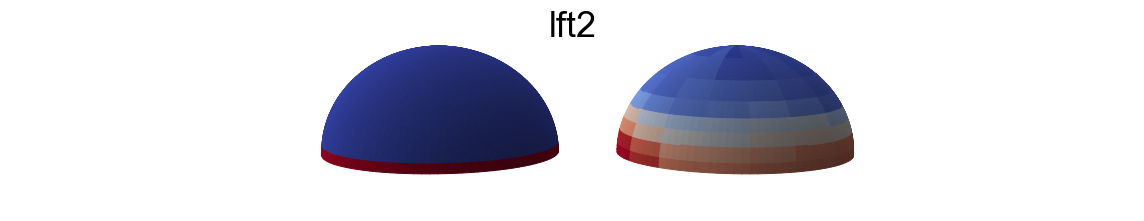

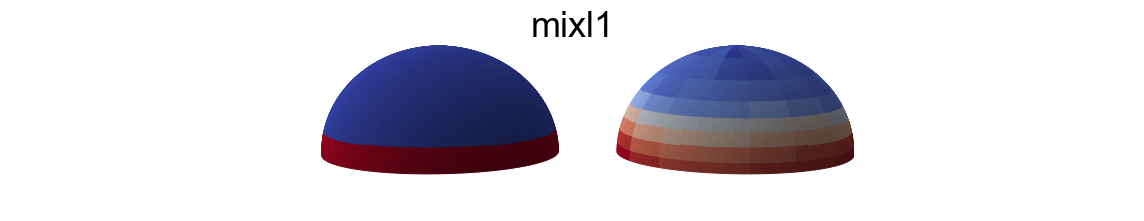

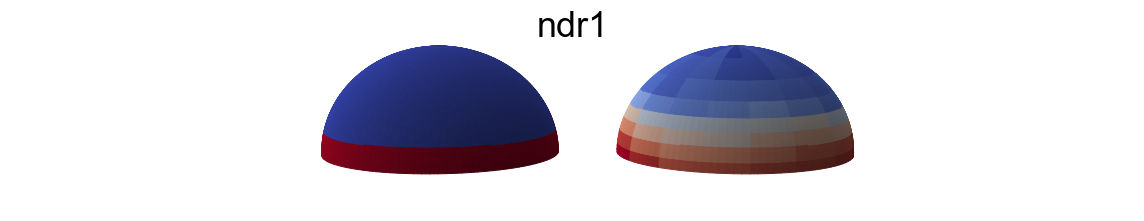

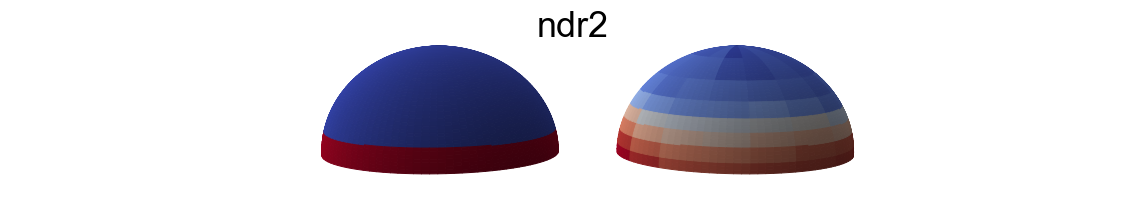

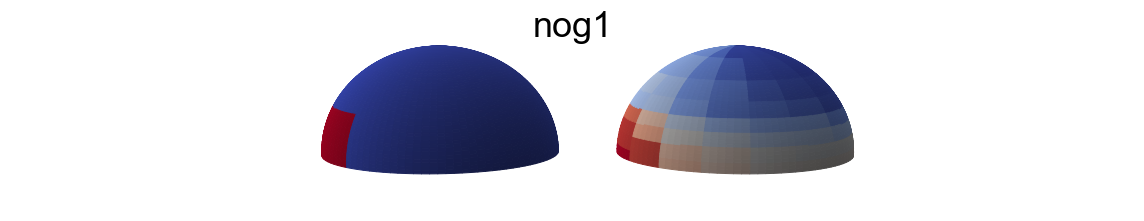

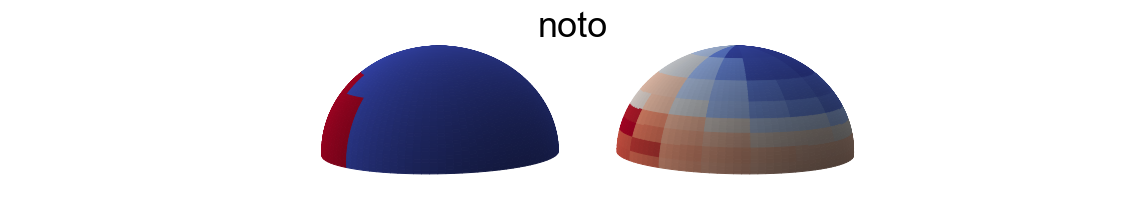

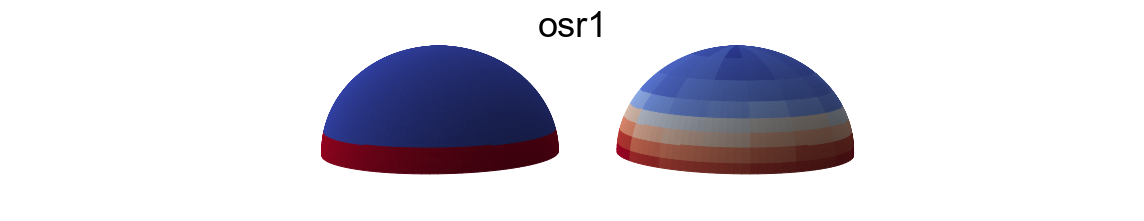

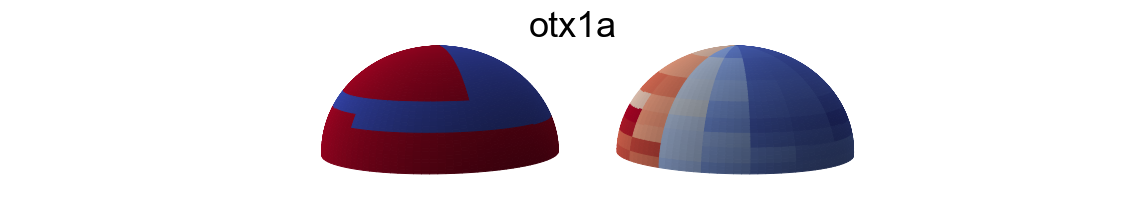

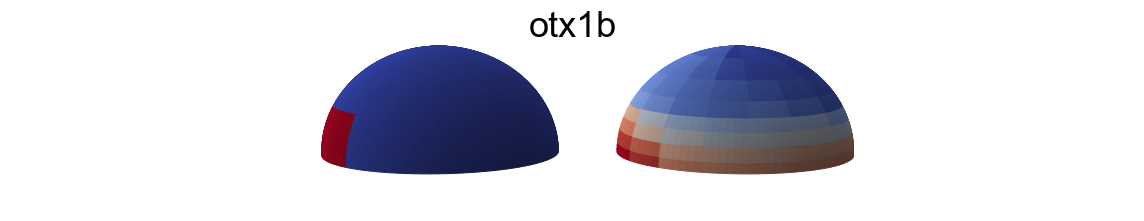

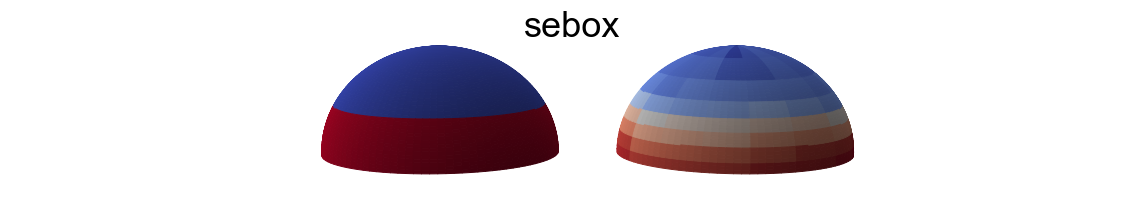

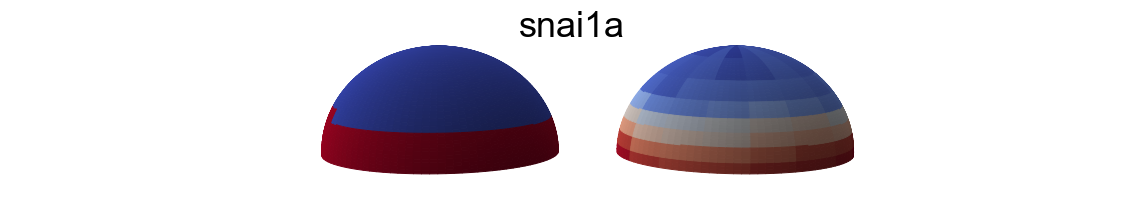

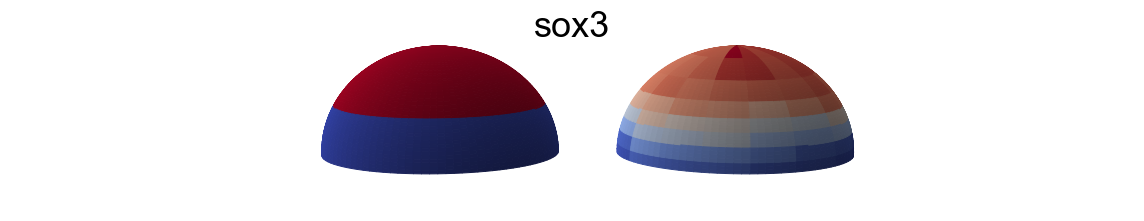

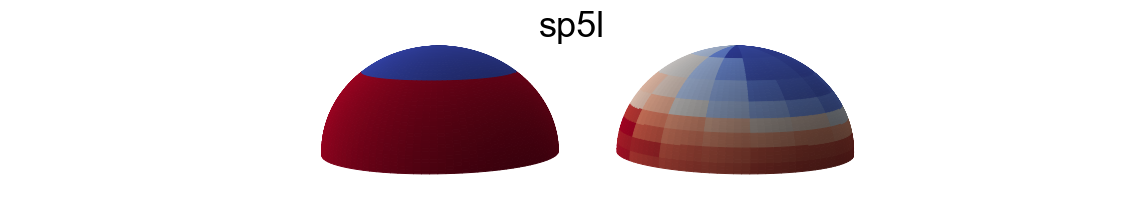

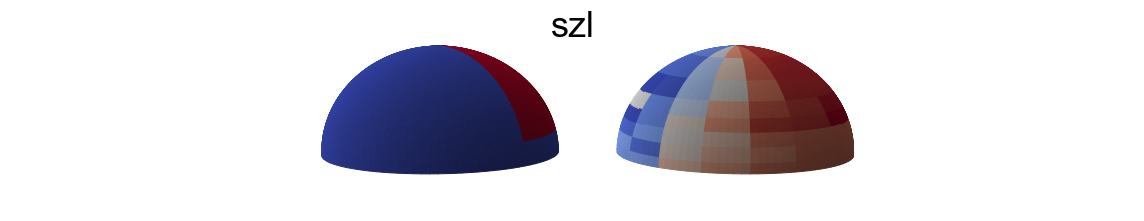

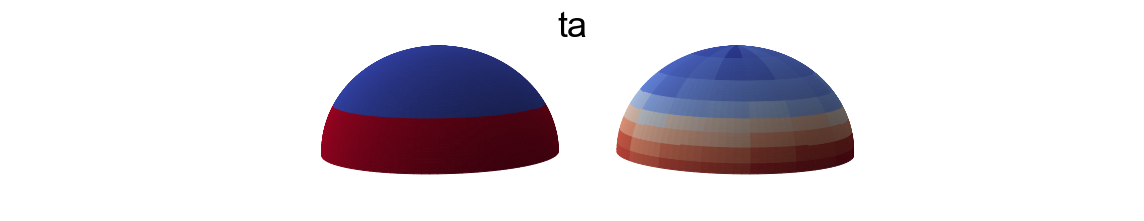

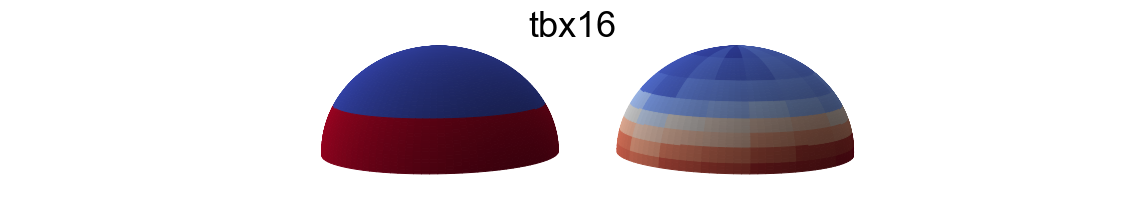

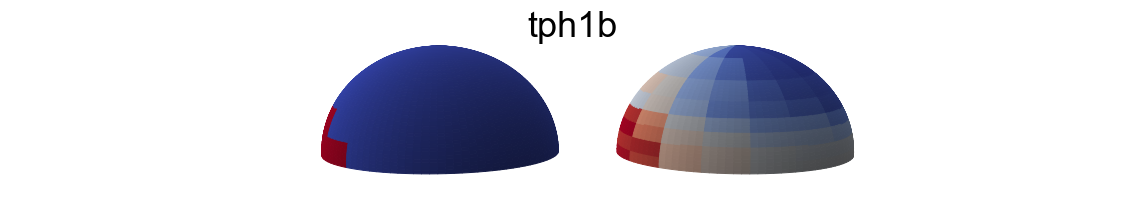

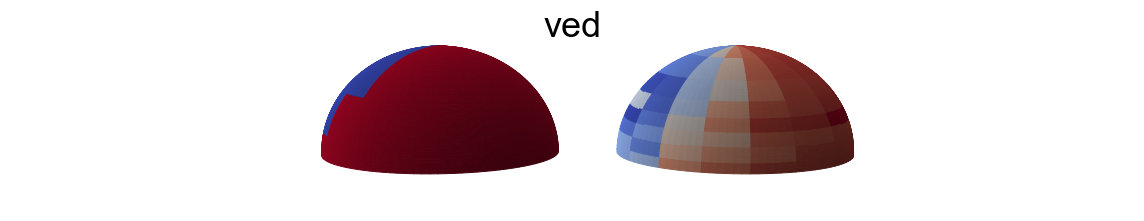

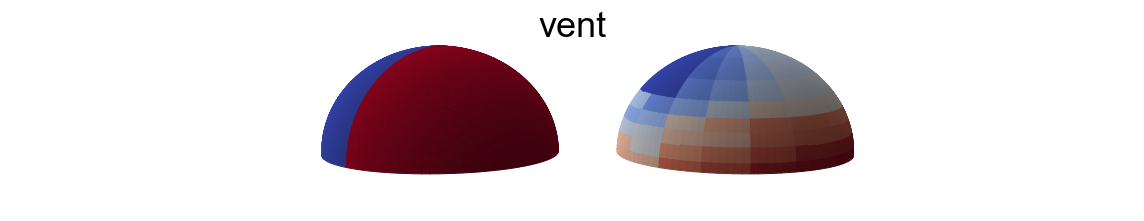

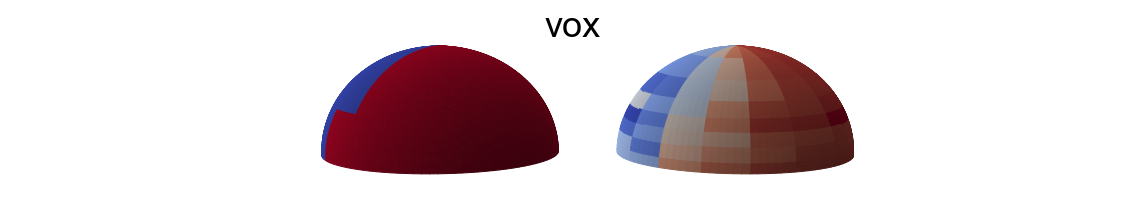

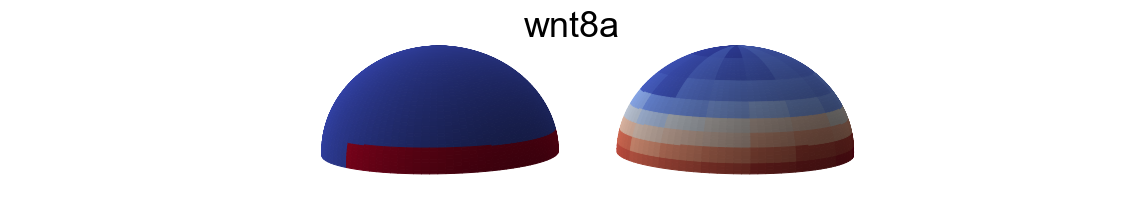

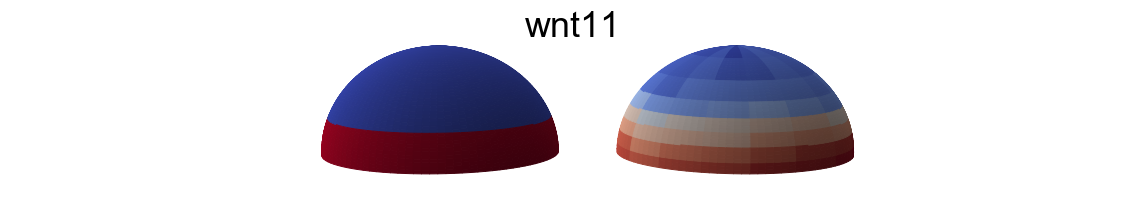

In [16]:
from scipy import interpolate
from scipy.interpolate import griddata
from matplotlib import cm
def plot_zf_plain(pts, f, ax, ybias):
    n_theta = 100
    n_phi = 50
    r = 1
    theta, phi = np.mgrid[-0.5*np.pi:0.5*np.pi:n_theta*1j, 0.0:0.5*np.pi:n_phi*1j]
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)
    phi_data = np.arccos(pts[:,2])
    theta_data = np.arcsin(pts[:,0]/np.sin(phi_data))
    pts_angle = np.concatenate((theta_data.reshape(-1,1), phi_data.reshape(-1,1)), axis=1)
    grid_c_nearest = griddata(pts_angle, f, (theta, phi), method='nearest')
    colors = (grid_c_nearest - grid_c_nearest.min())/(grid_c_nearest.max() - grid_c_nearest.min())
    ax.plot_surface(x,y+ybias,z,facecolors=cm.coolwarm(colors))
    ax.view_init(elev=10., azim=0)

df_pts = pd.read_csv(datadir+"/zf_geometry.txt", sep=' ')
pts = np.array( df_pts.values, float )
genes = list(issc.is_data_bin.columns.values)
for i in range(47):
    fig = plt.figure(figsize=plt.figaspect(0.2))
    ax = fig.add_subplot(111, projection='3d')
    plot_zf_plain(pts, X_is_bin[:,i], ax, 0)
    ax.set_title(genes[i], fontsize=36, fontname='arial', y=0.9)
    # ttl = ax.title
    # ttl.set_position([0.375, 0.85])
    plot_zf_plain(pts, X_is_pred[:,i], ax, 2.5)
    ax.axis("off")
    # ax.axis("equal")
    # fig.subplots_adjust(left=-0.5)
    plt.tight_layout()
    name = "%02d.png" % (i+1)
    plt.savefig(datadir+"/Figs/Loo_predictions/"+name, transparent=False, dpi=300, bbox_inches="tight", pad_inches=0)
#     os.system("convert -trim "+name+" "+name)



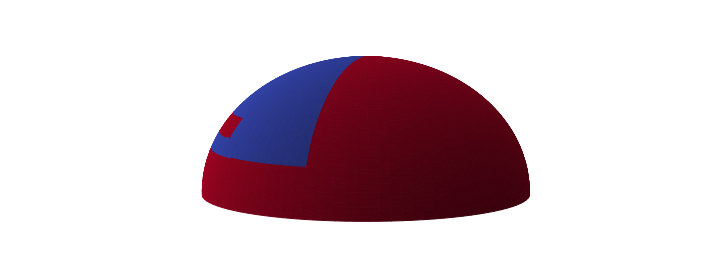

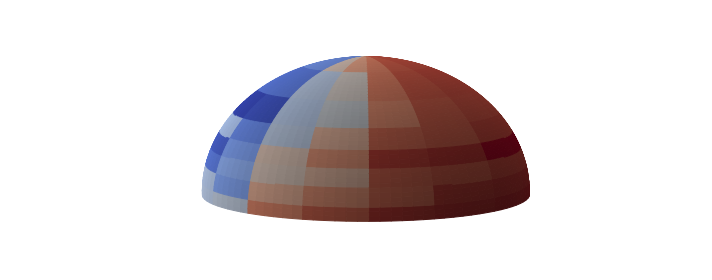

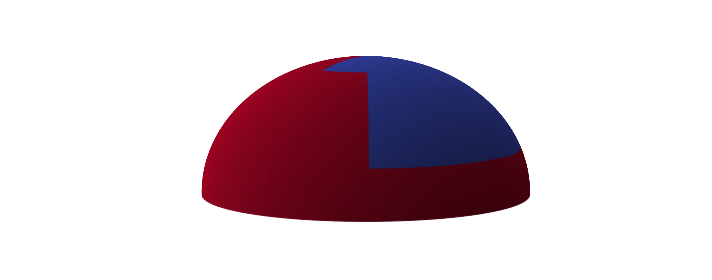

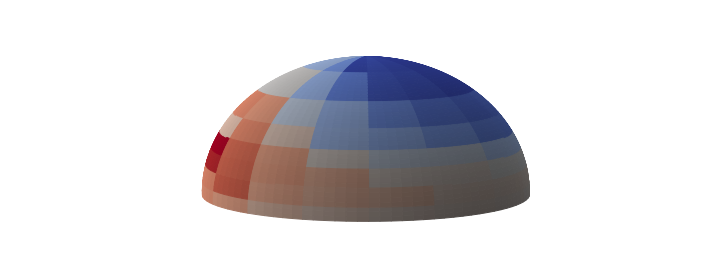

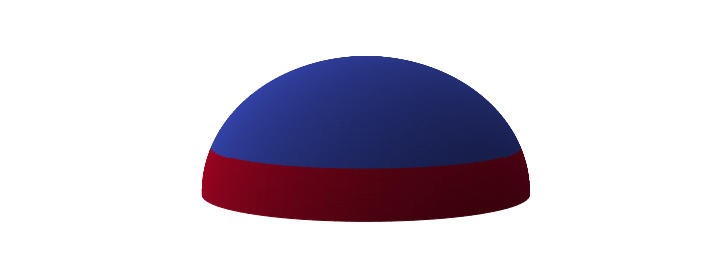

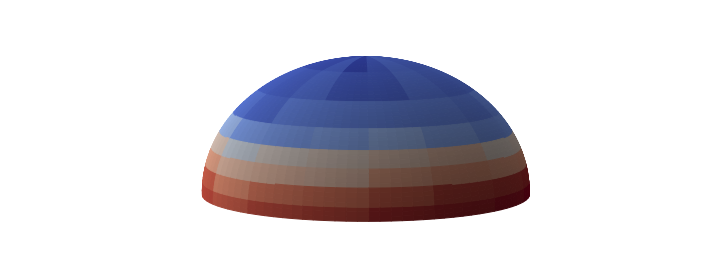

In [29]:
df_pts = pd.read_csv(datadir+"/zf_geometry.txt", sep=' ')
pts = np.array( df_pts.values, float )
genes = list(issc.is_data_bin.columns.values)
for i in range(47):
    gene = genes[i]
    if gene in ['bmp2b','foxd5','wnt11']:
        fig = plt.figure(figsize=plt.figaspect(0.4))
        ax = fig.add_subplot(111, projection='3d')
        plot_zf_plain(pts, X_is_bin[:,i], ax, 0)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(datadir+"/Figs/"+gene+"_true.png", dpi=300)
        fig = plt.figure(figsize=plt.figaspect(0.4))
        ax = fig.add_subplot(111, projection='3d')
        plot_zf_plain(pts, X_is_pred[:,i], ax, 0)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(datadir+"/Figs/"+gene+"_pred.png", dpi=300)